# Scipy: Scientific Python package

In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib nbagg

## Optimization

In [4]:
from scipy import optimize

In [28]:
def fonc(x, a = 1, b = 1):
    return np.exp(- a * x) * np.cos( b * x)

<IPython.core.display.Javascript object>


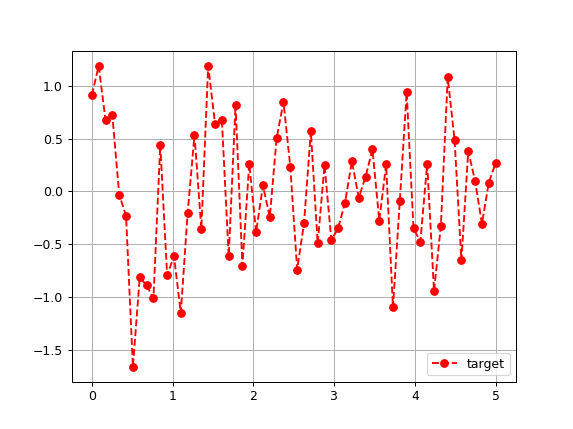

In [89]:
# Target values:
a, b = 0.5, 4. # Ces valeurs sont inconnues !
Np = 60
xs = np.linspace(0., 5., Np)
ys = fonc(xs, a=a, b=b) + np.random.normal(loc = 0., scale = 0.5, size = Np)
plt.figure()
plt.plot(xs, ys, "or--", label = "target")
plt.legend()
plt.grid()
plt.show()


In [40]:
def error(X):
    a, b = X
    y = fonc(xs, a=a, b=b)
    errors = y - ys
    return errors

X0 = [0, 0] # Start point 
sol = optimize.leastsq(error, X0, maxfev = 10000)
Xf = sol[0] # Final values
Xf
af, bf = Xf
af, bf

(1.8510506225312269, -16976639.978307817)

<IPython.core.display.Javascript object>


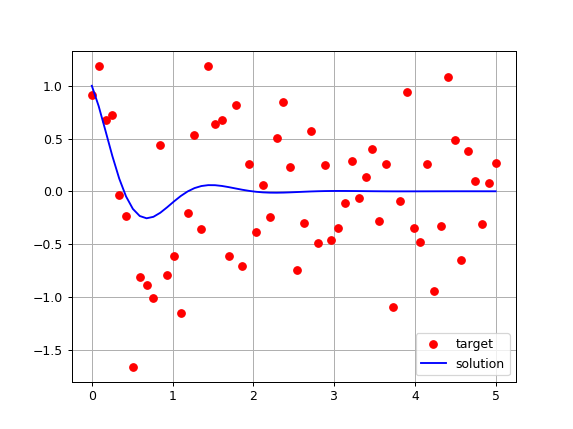

In [90]:
plt.figure()
plt.plot(xs, ys, "or", label = "target")
plt.plot(xs, fonc(xs, af, bf), "b-", label = "solution")
plt.legend()
plt.grid()
plt.show()

In [69]:
va = np.linspace(0., , 200)
vb = np.linspace(-10., 10, 200)
Va, Vb = np.meshgrid(va, vb)

In [91]:
E = np.zeros_like(Va)
Nl, Nc = Va.shape
for i in range(Nl):
    for j in range(Nc):
        E[i, j] = ((fonc(xs, Va[i,j], Vb[i, j]) - ys)**2).sum()

<IPython.core.display.Javascript object>


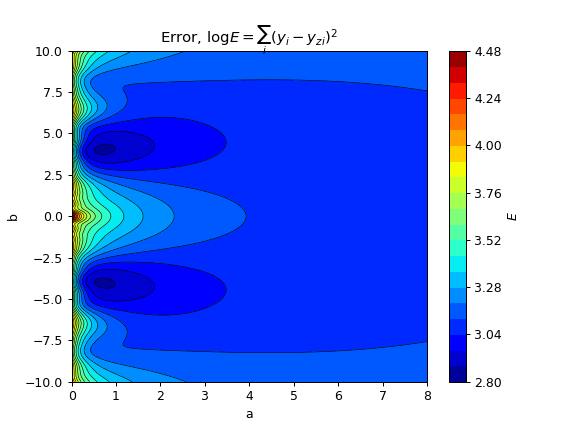

In [92]:
from matplotlib import cm
plt.figure()
plt.contourf(Va, Vb, np.log(E), 20, cmap = cm.jet)
cbar = plt.colorbar()
plt.contour(Va, Vb, np.log(E), 20, 
            colors = "black", 
            linewidths = .5)
plt.xlabel("a")
plt.ylabel("b")
plt.title("Error, $\log E = \sum_i (y_i-y_{zi})^2$")
cbar.set_label("$E$")
plt.savefig("Error.pdf")
plt.show()